In [2]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore') #filtering warnings

#Libraries for Model Building
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import various functions from scipy
from scipy import stats

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# Reading the Dataset
df=pd.read_excel('original_data_set1.xlsx')
df.head()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       10683 non-null  int64 
 1   Airline          10683 non-null  object
 2   Date_of_Journey  10683 non-null  object
 3   Source           10683 non-null  object
 4   Destination      10683 non-null  object
 5   Route            10682 non-null  object
 6   Dep_Time         10683 non-null  object
 7   Arrival_Time     10683 non-null  object
 8   Duration         10683 non-null  object
 9   Total_Stops      10682 non-null  object
 10  Additional_Info  10683 non-null  object
 11  Price            10683 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1001.7+ KB


In [5]:
# Retaining the original dataset
df_original=df.copy()

In [6]:
df_original.head()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Splitting the Date_of_Journey Column into Date and Month

In [7]:
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey , format = '%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey , format = '%d/%m/%Y').dt.month
df.head(1)

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [8]:
df['Dep_hour'] = pd.to_datetime(df.Dep_Time ).dt.hour
df['Dep_Minute'] = pd.to_datetime(df.Dep_Time ).dt.minute
df.head(1)

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [9]:
df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time ).dt.hour
df['Arrival_Minute'] = pd.to_datetime(df.Arrival_Time ).dt.minute
df.head(1)

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


In [10]:
duration = list(df.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
            
duration
duration_hour=[]
duration_minute=[]

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0] ))
    duration_minute.append(int( duration[i].split('m')[0].split()[-1] ))

In [11]:
df['Duration_Hour'] = duration_hour
df['Duration_Minute'] = duration_minute

In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True) #No relevence to our Analysis

df.drop('Arrival_Time',axis=1,inplace=True) #Converted to Arrival_hour,Arrival_Minute

df.drop('Dep_Time',axis=1,inplace=True) #Converted to Dep_hour,Dep_Minute

df.drop('Route',axis=1,inplace=True) #No relevence to our Analysis

df.drop('Additional_Info',axis=1,inplace=True) #No relevence to our Analysis

df.drop('Duration',axis=1,inplace=True) #Converted to Duration_Hour,Duration_Minute

df.drop('Date_of_Journey',axis=1,inplace=True) #converted to Journey_Day, Journey_Month

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Price            10683 non-null  int64 
 5   Journey_Day      10683 non-null  int64 
 6   Journey_Month    10683 non-null  int64 
 7   Dep_hour         10683 non-null  int64 
 8   Dep_Minute       10683 non-null  int64 
 9   Arrival_hour     10683 non-null  int64 
 10  Arrival_Minute   10683 non-null  int64 
 11  Duration_Hour    10683 non-null  int64 
 12  Duration_Minute  10683 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [14]:
df.shape

(10683, 13)

NULL Value Treatment

In [15]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        1
Price              0
Journey_Day        0
Journey_Month      0
Dep_hour           0
Dep_Minute         0
Arrival_hour       0
Arrival_Minute     0
Duration_Hour      0
Duration_Minute    0
dtype: int64

In [16]:
# There was 1 row with null value so the row has been dropped.
df = df.dropna(subset=["Total_Stops"])

In [17]:
df['Total_Stops'].isnull().sum()

0

In [18]:
# Total stops column converted to numerric column
df['Total_Stops'] = df['Total_Stops'].str.replace("non-stop", '0').str.replace('2 stops','2').str.replace('1 stop','1').str.replace("3 stops", '3').str.replace("4 stops", '4')

In [19]:
df.describe()

,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


Seperating categorical and Numerical data 

In [20]:
df['Total_Stops'] = df['Total_Stops'].astype(np.int64)

In [21]:
df_numerical = df.select_dtypes(include=np.number)
df_catagorical = df.select_dtypes(include ='object')

In [22]:
df_catagorical.head(1)

,Airline,Source,Destination
0,IndiGo,Banglore,New Delhi


In [23]:
df_numerical.head(1)

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,0,3897,24,3,22,20,1,10,2,50


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Total_Stops      10682 non-null  int64 
 4   Price            10682 non-null  int64 
 5   Journey_Day      10682 non-null  int64 
 6   Journey_Month    10682 non-null  int64 
 7   Dep_hour         10682 non-null  int64 
 8   Dep_Minute       10682 non-null  int64 
 9   Arrival_hour     10682 non-null  int64 
 10  Arrival_Minute   10682 non-null  int64 
 11  Duration_Hour    10682 non-null  int64 
 12  Duration_Minute  10682 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


# EDA

## Analysing the Target variable

1.812404554693161


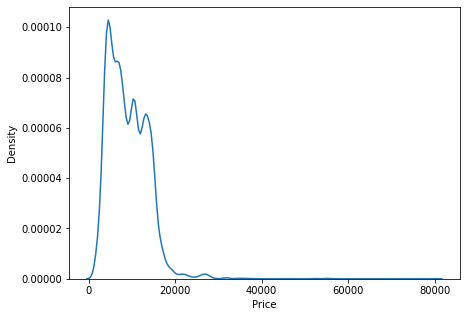

In [111]:
plt.rcParams["figure.figsize"]=(7,5)
print(df["Price"].skew())
sns.kdeplot(df['Price'])
plt.show()

Price is positively/Right Skewed

## Analysing Categorical Variables

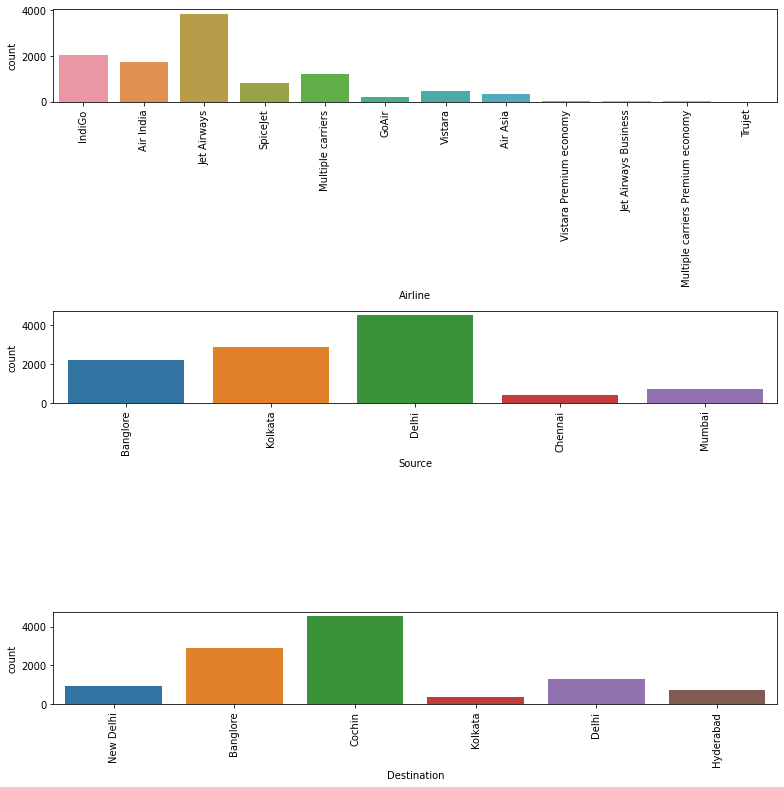

In [28]:
plt.rcParams["figure.figsize"]=(11,11)
a = 1
for i in df_catagorical:
    plt.subplot(3,1,a)
    sns.countplot(df_catagorical[i])
    plt.xticks(rotation= 90)
    plt.tight_layout (pad = 5.0)
    a = a+1
plt.tight_layout()
plt.show()

In the above graphs we see the individual distribution of the 3 main categorical variables.  
Below we will see the distribution of each with respect to price

<AxesSubplot:xlabel='Airline', ylabel='Price'>

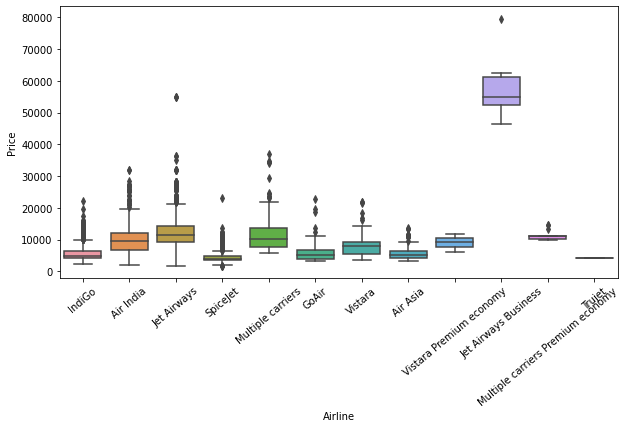

In [98]:
plt.rcParams["figure.figsize"]=(10, 5)
plt.xticks(rotation=40)
sns.boxplot(data=df, x="Airline", y="Price")


As seen, Jet Airways business is the most expensive while the others are scattered over the lower range

<AxesSubplot:xlabel='Source', ylabel='Price'>

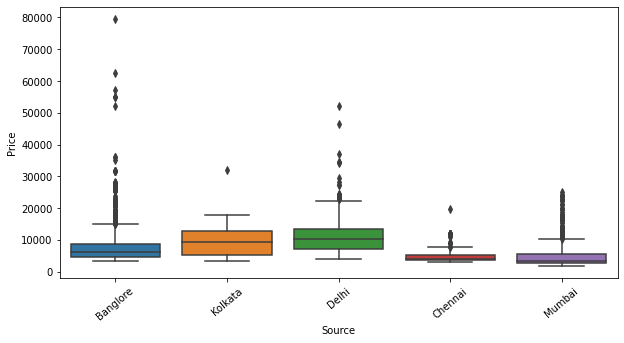

In [99]:
plt.rcParams["figure.figsize"]=(10, 5)
plt.xticks(rotation=40)
sns.boxplot(data=df, x="Source", y="Price")


<AxesSubplot:xlabel='Destination', ylabel='Price'>

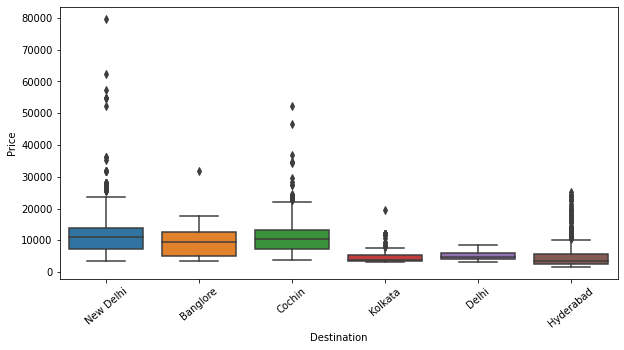

In [100]:
plt.rcParams["figure.figsize"]=(10, 5)
plt.xticks(rotation=40)
sns.boxplot(data=df, x="Destination", y="Price")


From the above 2 graphs we can make out that Jet Airways Business Airlines majorly travel from Banglore to New Delhi

<AxesSubplot:xlabel='Source', ylabel='count'>

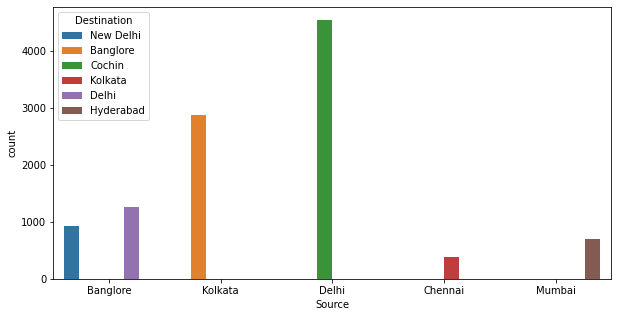

In [101]:
# plt.rcParams["figure.figsize"]=(10, 5)
# plt.xticks(rotation=40)
sns.countplot(data=df, x="Source", hue="Destination")

From this graph we try to ascertain how the source and destination columns are related.
There seems to be a 1-1 mapping.

## Analysing Numerical Variables

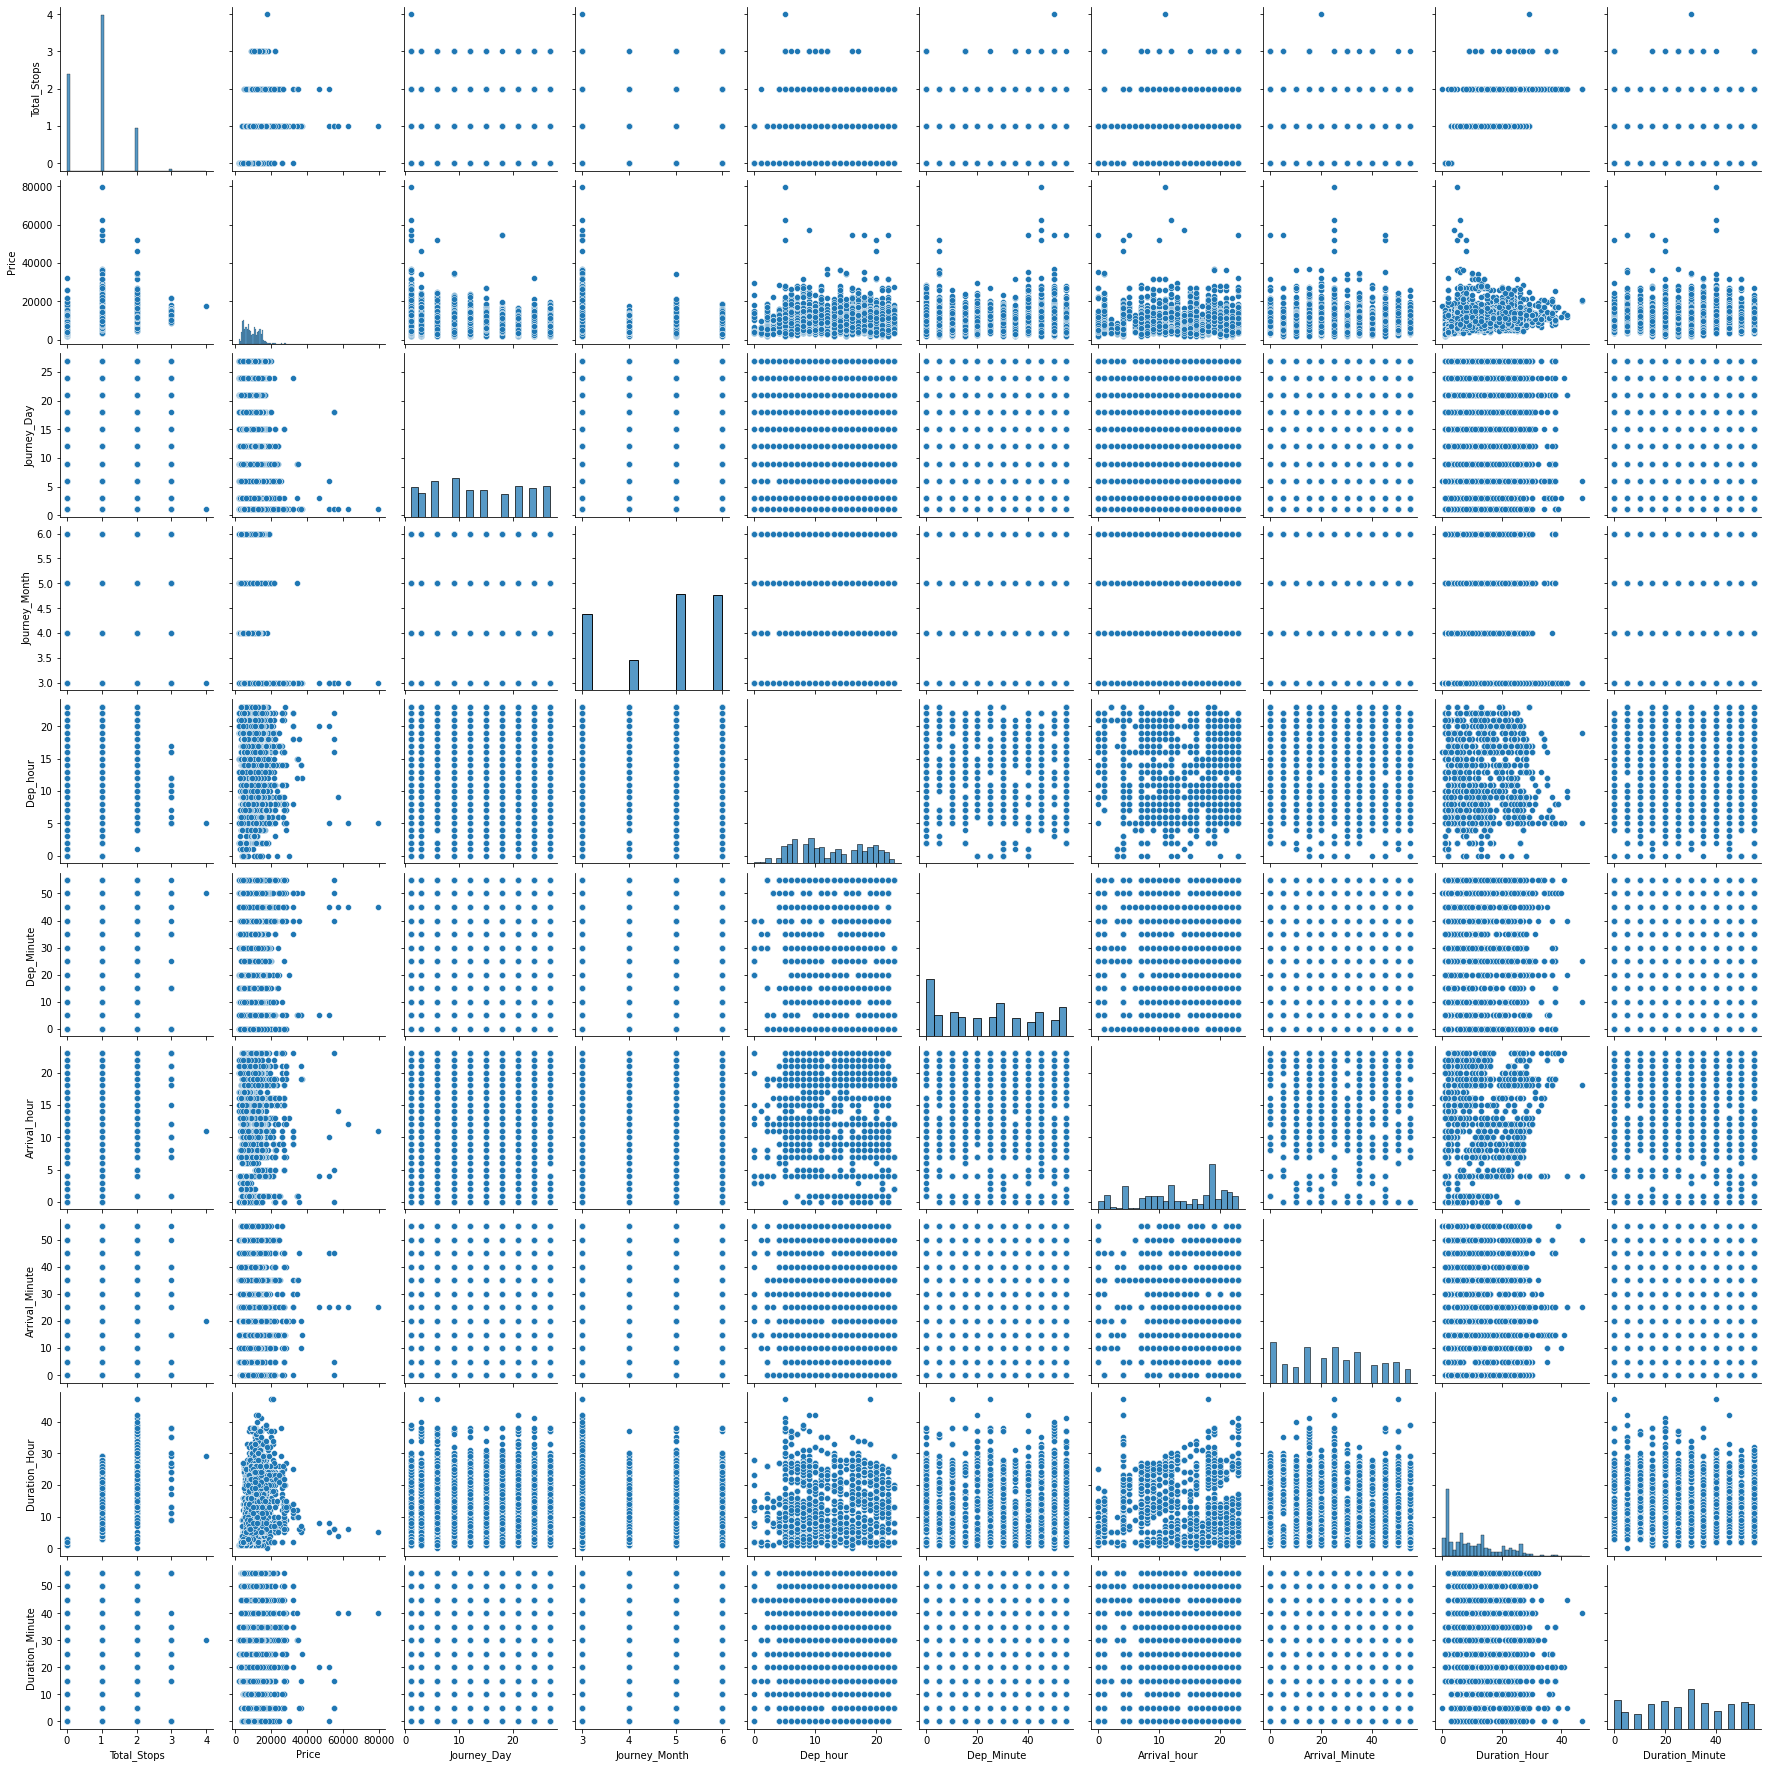

In [29]:
sns.pairplot(df)

There does not seem to be any distinctive pattern amongst the numerical variables.  
Below we will see the relation of the most prominent with respect to price.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

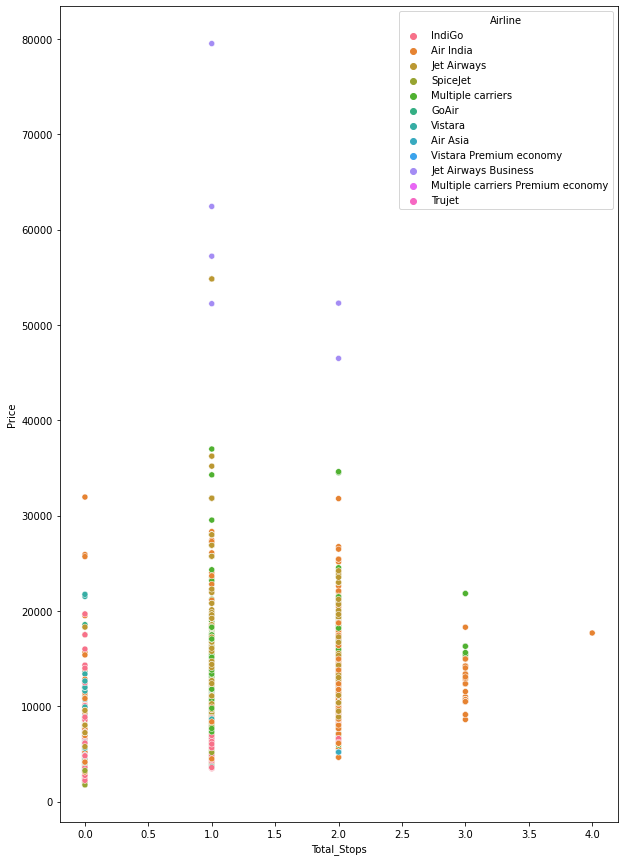

In [107]:
plt.rcParams["figure.figsize"]=(10,15)
sns.scatterplot(data=df, x="Total_Stops", y="Price", hue="Airline")

There seems to be a dependent relation between Price and Airline+Stops   
Most expensive tickets are for 1 stop and 2 stop flights  
We can also see that not all airlines have 3/4 stop flights

<AxesSubplot:xlabel='Duration_Hour', ylabel='Price'>

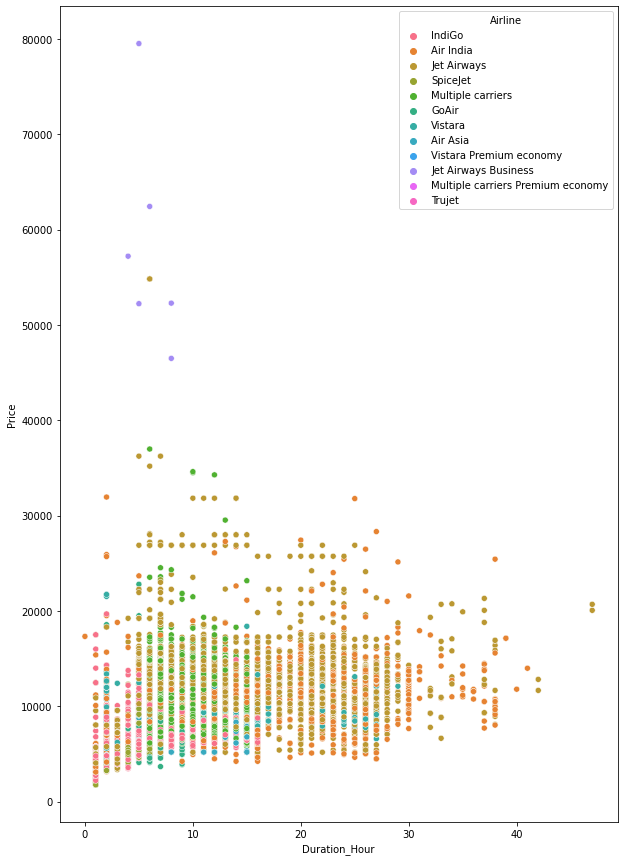

In [108]:
plt.rcParams["figure.figsize"]=(10,15)
sns.scatterplot(data=df, x="Duration_Hour", y="Price", hue="Airline")

The most expensive airline (Jet Airways Business) has travel time of 5-10 hours.  
Excluding that, most expensive flights have a duration from 5-25 hours.  
Again not all airlines have duration for more than 30 hours. This is synonymous to our previous finding of limited airlines having more than 2 stops.  
Multiple carrier flights have travel time from 5-15 only.

## Re-analysing the Target variable

Now we will try to see Price for average airlines exclusing majorly expensive flights (>20000)

0.32792367088341856


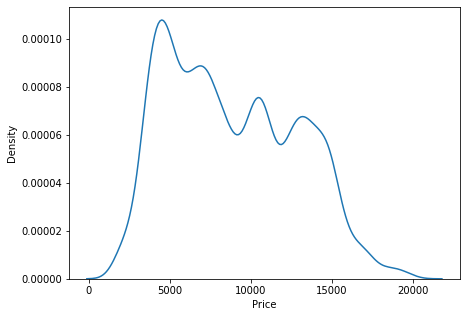

In [119]:
new_price = df[df.Price<=20000]['Price']
plt.rcParams["figure.figsize"]=(7,5)
print(new_price.skew())
sns.kdeplot(new_price)
plt.show()

Now we will try to split the new price model based on destinations

In [120]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

2.994171344225367


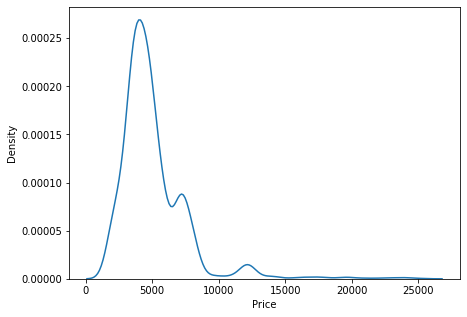

In [125]:
new_price = df[(df.Destination.isin(["Kolkata", "Delhi", "Hyderabad"]))]['Price']
plt.rcParams["figure.figsize"]=(7,5)
print(new_price.skew())
sns.kdeplot(new_price)
plt.show()

Except for certain outliers (Price>10000), the data seems to be normally distributed

# Feature Engineering

In [30]:
# Encoding the Categorical Variables for further analysis

In [31]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

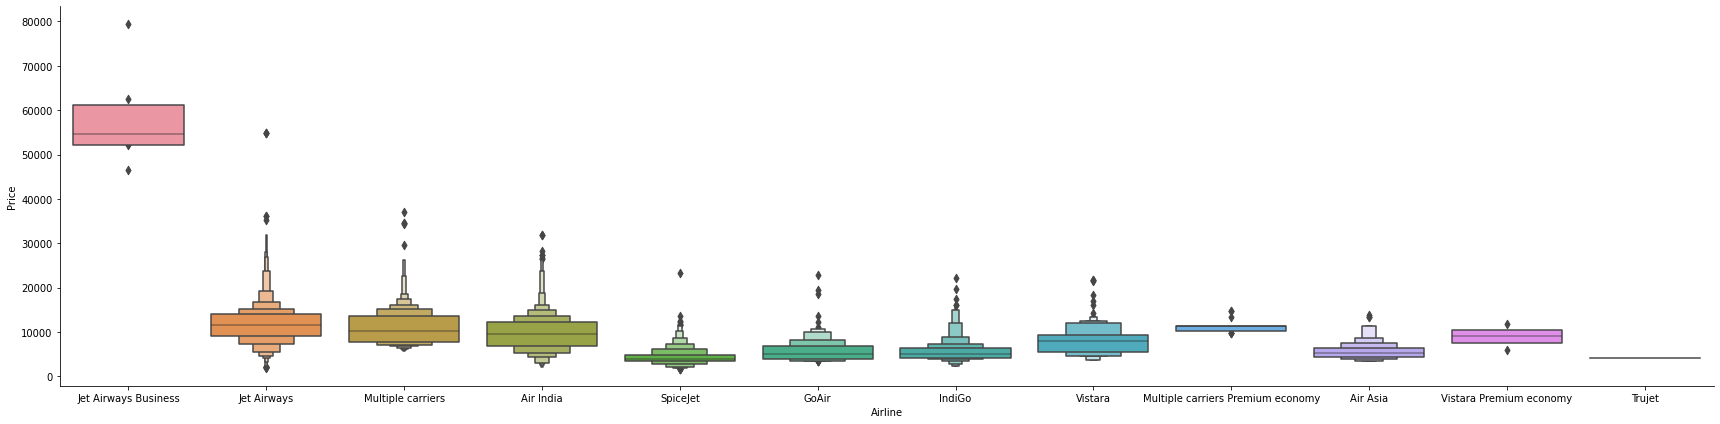

In [32]:
sns.catplot(y='Price' , x='Airline' , data = df.sort_values('Price',ascending=False) , kind='boxen' , height=6 , aspect=4)

In [33]:
Airline = df['Airline']
Airline = pd.get_dummies(Airline , drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


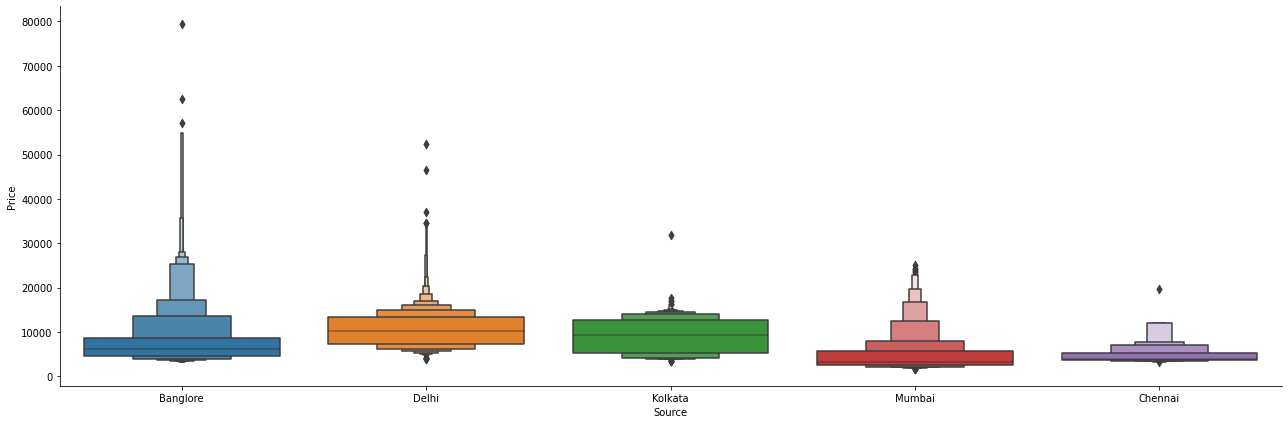

In [34]:
sns.catplot(y='Price' , x='Source' , data = df.sort_values('Price',ascending=False) , kind='boxen' , height=6 , aspect=3)

In [35]:
Source = df[['Source']]

Source = pd.get_dummies(Source , drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [36]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

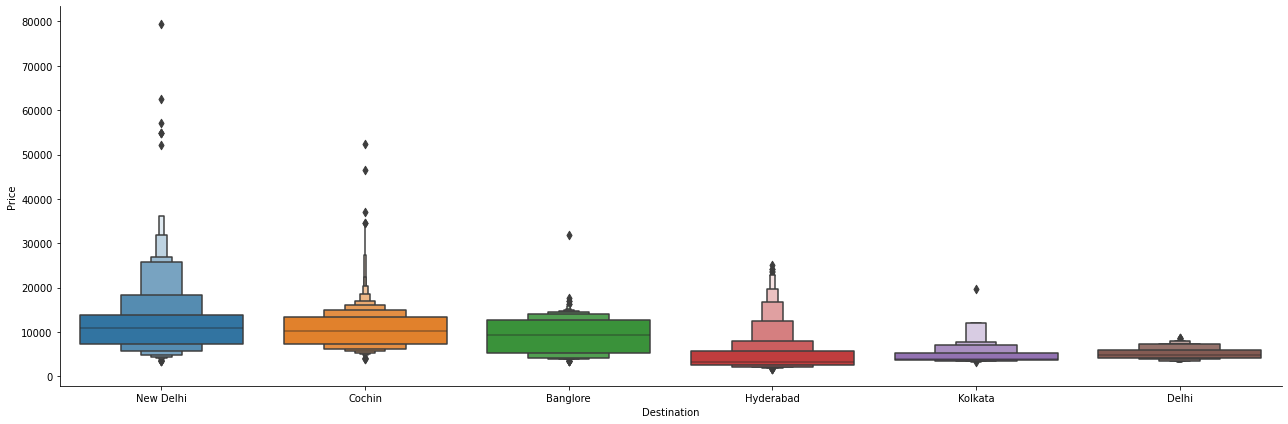

In [37]:
sns.catplot(y='Price' , x='Destination' , data = df.sort_values('Price',ascending=False) , kind='boxen' , height=6 , aspect=3)

In [38]:
Destination = df[['Destination']]

Destination = pd.get_dummies(Destination , drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [39]:
df_encoded_final = pd.concat( [df, Airline ,Source , Destination] , axis=1)

In [40]:
df_encoded_final.drop(columns = [ 'Airline' , 'Source' , 'Destination' ] , inplace=True)

In [41]:
df_encoded_final.head(2)

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [42]:
df_correlation=df_encoded_final.corr()
df_correlation

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,0.271094,-0.060110,-0.302991,0.215063,0.017876,0.118399,0.009089,-0.274351,0.002519,-0.120447,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,0.050432,-0.095151,-0.361070,0.416124,0.253303,0.139793,0.017650,-0.296565,-0.010381,-0.060654,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Journey_Day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,-0.032490,-0.003122,0.007281,-0.017304,-0.031713,0.042163,0.030839,0.022154,-0.008569,-0.013169,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
Journey_Month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,-0.045981,-0.004494,-0.048504,0.059735,-0.034787,0.053685,-0.051222,-0.011977,-0.014199,-0.017252,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Dep_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,-0.012879,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.000857,0.023906,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dep_Minute,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,-0.045688,0.076751,-0.014714,0.024455,0.009168,-0.109370,-0.004624,0.092634,-0.010007,-0.077903,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,0.088872,0.018526,-0.071491,-0.027377,-0.014456,0.067930,0.013491,-0.090058,0.003739,0.068834,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_Minute,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,0.061231,0.096839,0.035124,-0.057698,0.005232,-0.167455,-0.001786,0.012543,-0.002750,0.069422,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Duration_Hour,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,0.261707,-0.094044,-0.346230,0.307196,-0.011847,-0.008070,-0.002271,-0.263844,-0.008253,-0.020358,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
Duration_Minute,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,-0.033427,0.067215,0.119817,-0.084052,-0.002322,-0.118766,-0.006853,0.041319,-0.007610,0.041952,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866


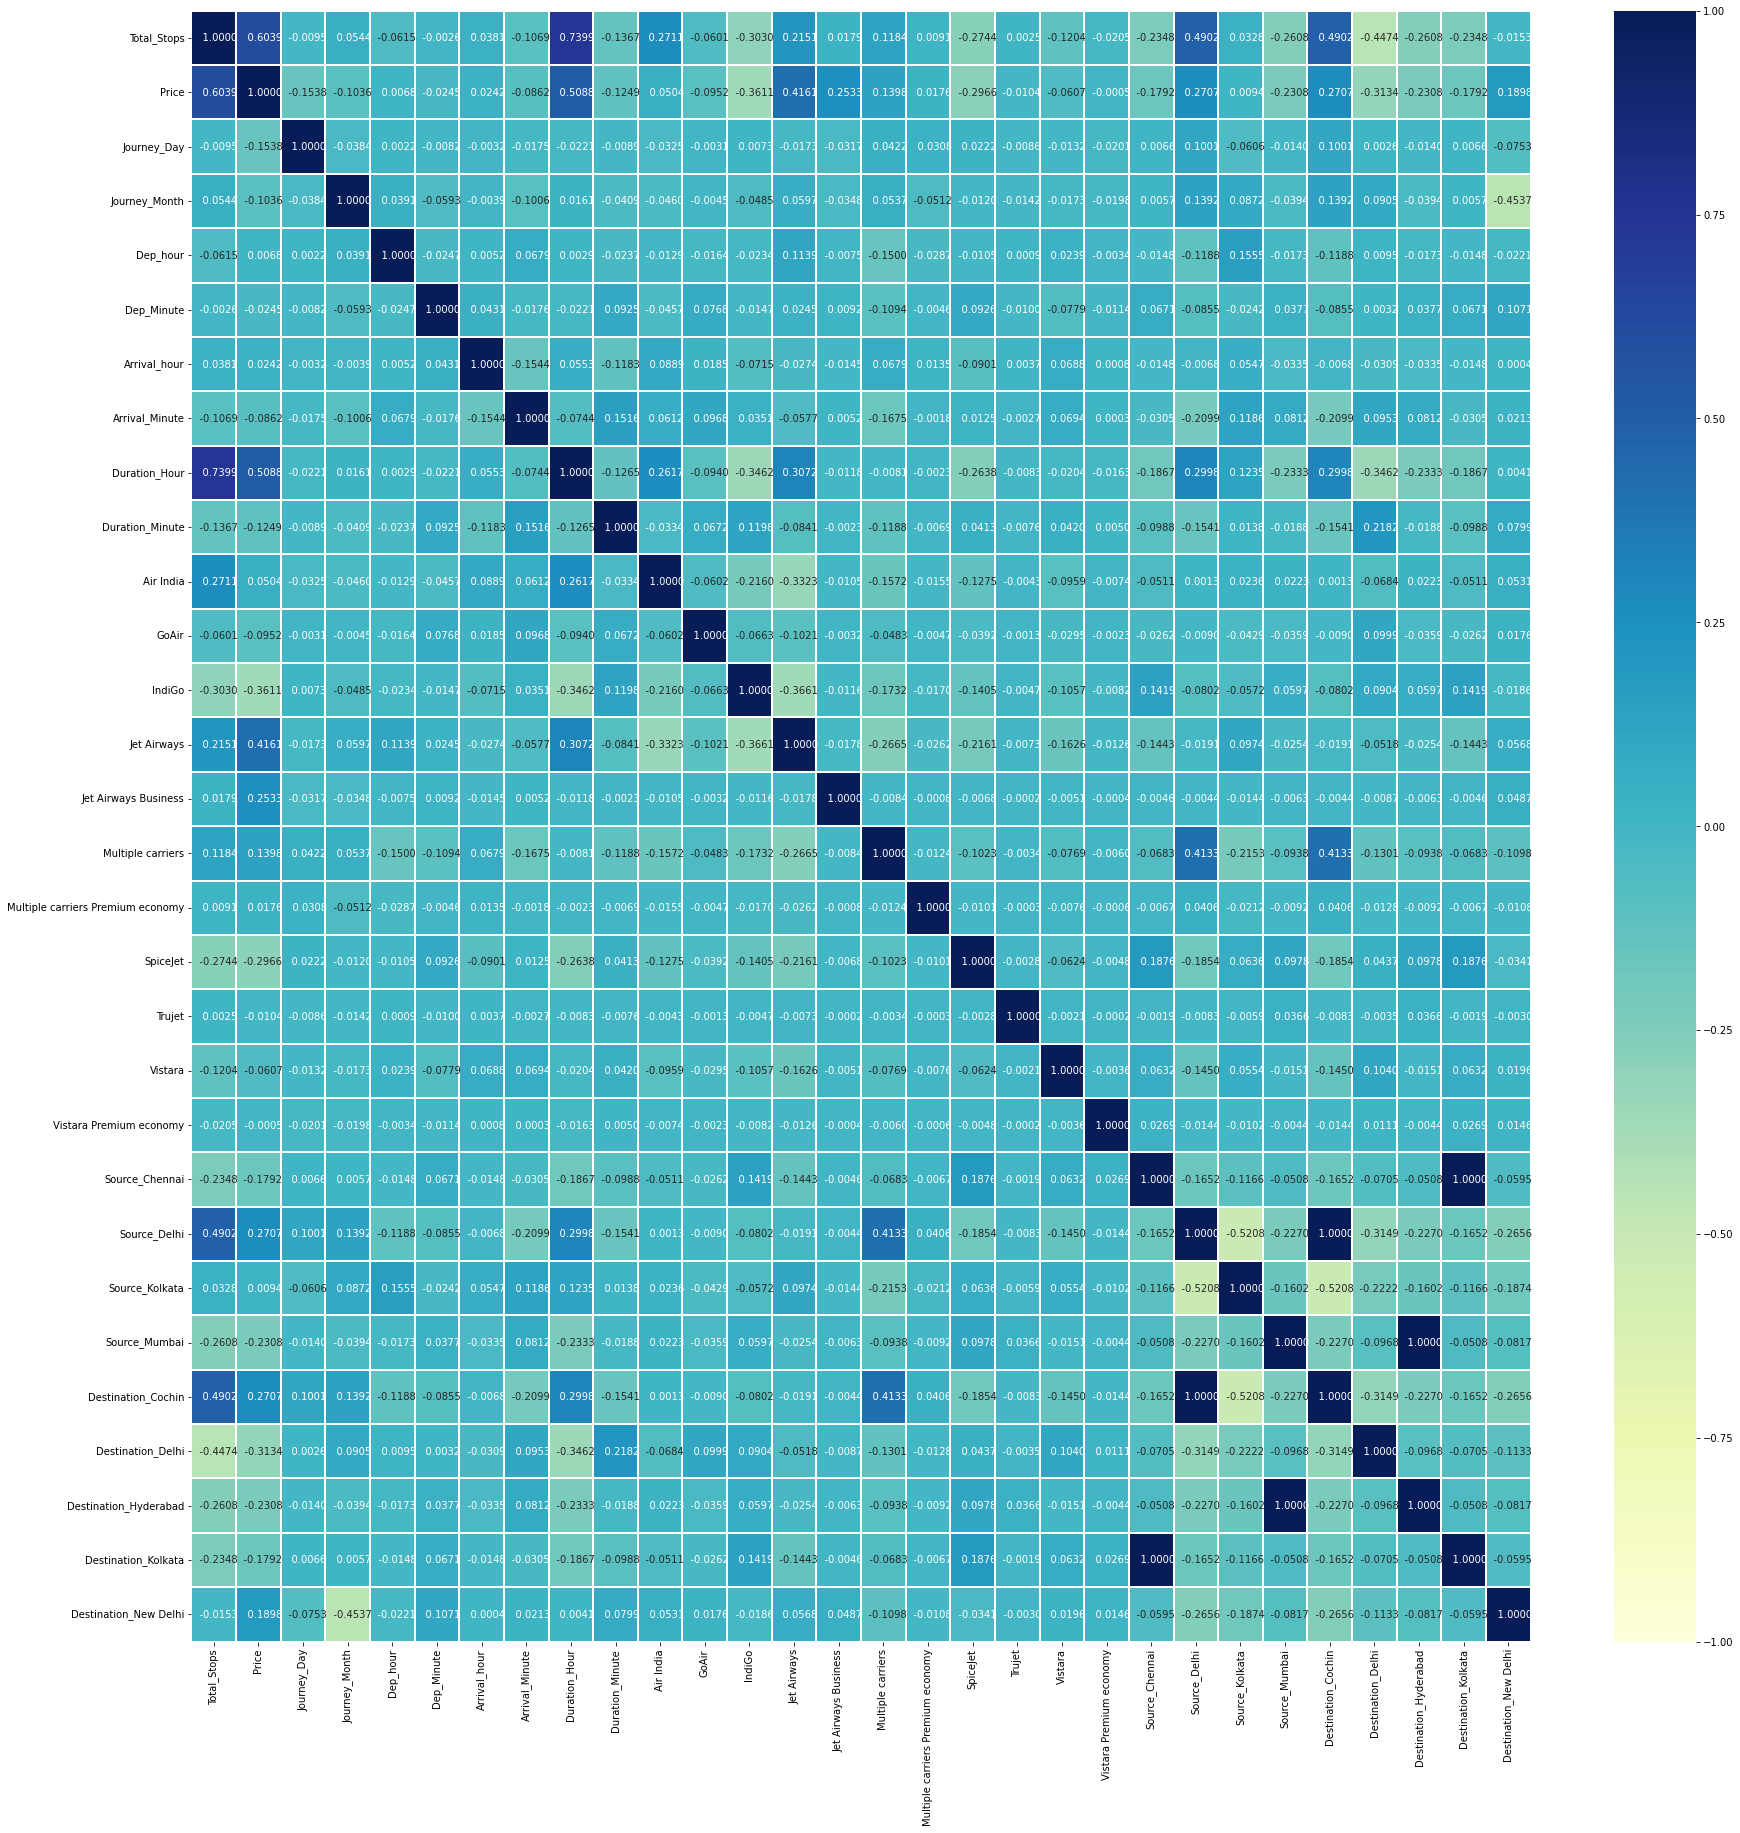

In [43]:
fig,ax = plt.subplots(figsize=(30,30))
sns.heatmap(df_correlation, annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')
plt.show()
#plt.figure(figsize=(20,20))
#sns.heatmap(flight.corr() , annot=True , cmap = 'YlGnBu')
#plt.show()

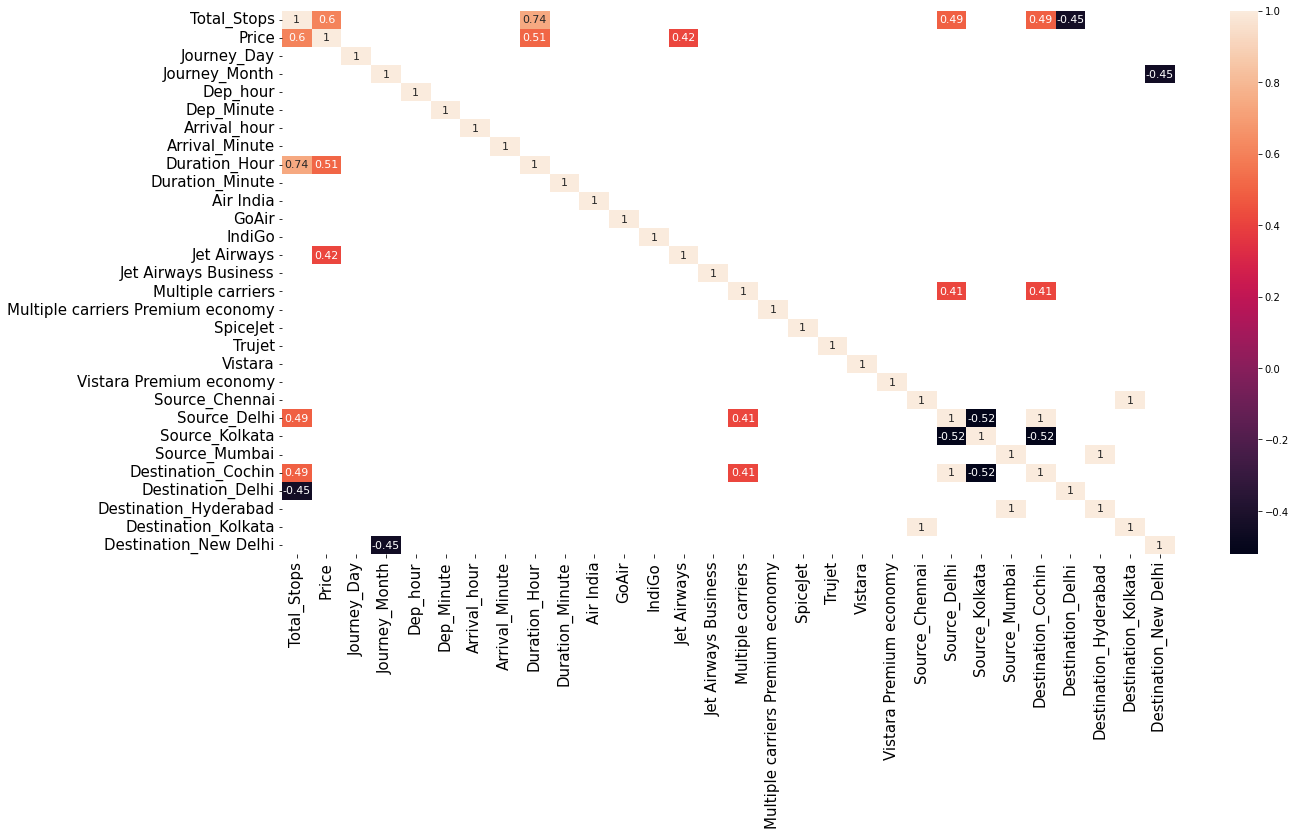

In [44]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_correlation[np.abs(df_correlation) > 0.4] ,annot = True, annot_kws = {"size": 11})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

In [45]:
df["Total_Stops"].skew()

0.3171089951683756

In [46]:
mean = np.mean(df)
std = np.std(df)
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is Total_Stops          0.824190
Price             9087.214567
Journey_Day         13.509081
Journey_Month        4.708575
Dep_hour            12.491013
Dep_Minute          24.409287
Arrival_hour        13.349186
Arrival_Minute      24.690601
Duration_Hour       10.244898
Duration_Minute     28.326624
dtype: float64
std. deviation is Total_Stops          0.675197
Price             4611.332949
Journey_Day          8.478966
Journey_Month        1.164354
Dep_hour             5.748551
Dep_Minute          18.766923
Arrival_hour         6.858996
Arrival_Minute      16.506035
Duration_Hour        8.494518
Duration_Minute     16.945023
dtype: float64


In [47]:
print("Mean value of Price",df.Price.mean())
print("Standard deviation of Price",df.Price.std())
print("Minimum value of Price",df.Price.min())
print("Maximum value of Price",df.Price.max())

Mean value of Price 9087.21456656057
Standard deviation of Price 4611.548810094342
Minimum value of Price 1759
Maximum value of Price 79512


In [48]:
mean_price=np.mean(df["Price"])
std_price=np.std(df["Price"])
print("Mean Price: ",mean_price, '\t','\t', 'Standard Deviation: ', std_price)

Mean Price:  9087.21456656057 	 	 Standard Deviation:  4611.33294898485


QQ Plot

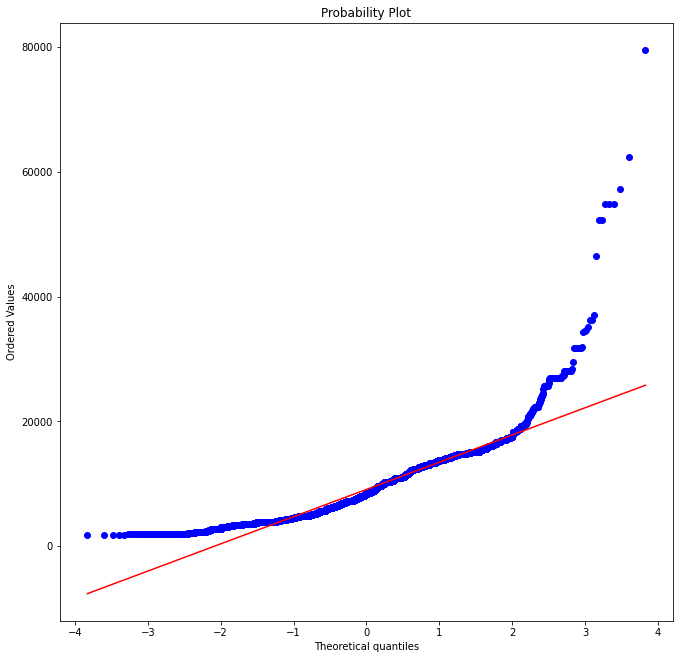

In [49]:
import pylab

import scipy.stats as stats

measurements = df['Price']

stats.probplot(measurements, dist="norm", plot=pylab);

In [50]:
df_numerical.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


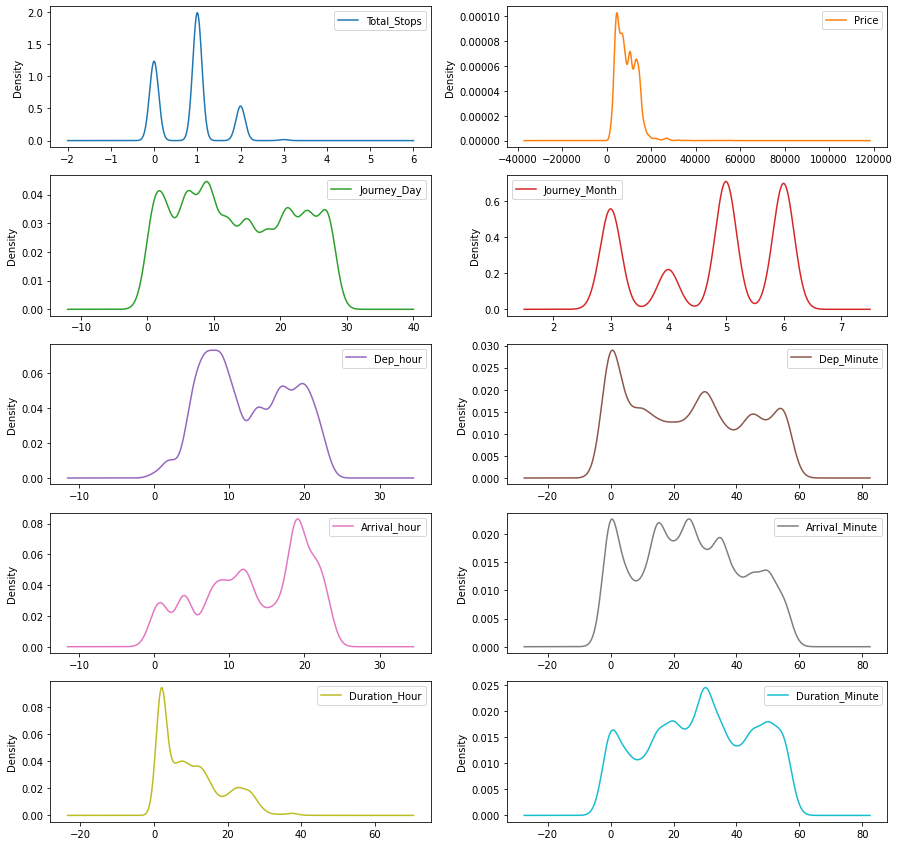

In [51]:
plt.rcParams["figure.figsize"] = [15,15]

# plot density plot using plot()

# kind: set the type of plot

# subplots: indicates whether to plot subplot for each variable or a single line plot

# layout: specify the arrangement of the subplots

# sharex: indicates whether to have the same scale on x-axis of all subplots

df_numerical.plot(kind = 'density', subplots = True, layout = (5,2), sharex = False)

# show plot

plt.show()

# Feature Selection

In [52]:
X = df_encoded_final.drop(columns='Price',axis=1)
y = df_encoded_final['Price']

Extra Tree Regressor for feature Selection

In [53]:
etr = ExtraTreesRegressor()
etr.fit(X,y)

ExtraTreesRegressor()

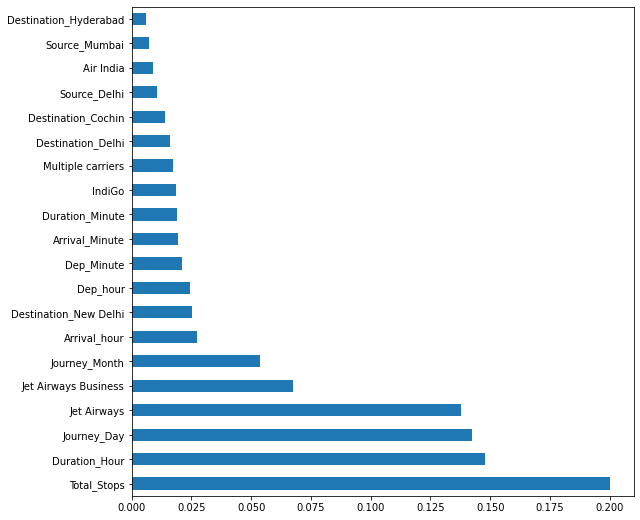

In [54]:
plt.figure(figsize=(9,9))

feat = pd.Series(etr.feature_importances_ , index=X.columns)
feat.nlargest(20).plot(kind='barh')

plt.show()

In [55]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=49)

In [56]:
import scipy.stats as stats

In [57]:
stats.ttest_ind(X,X_train)

Ttest_indResult(statistic=array([-0.06310558,  0.36902385, -0.25780523, -0.01301153,  0.1771827 ,
        0.80801096, -0.09226168,  0.08993744,  0.17435238, -0.5708667 ,
        0.01142119, -0.11688384,  0.15092062, -0.06755179,  0.27504323,
        0.33372416,  0.10180418, -0.15816394,  0.16295796, -0.27397685,
       -0.39833508,  0.07414775, -0.13382327, -0.04696005,  0.07414775,
        0.57469178, -0.04696005, -0.39833508, -0.26938394]), pvalue=array([0.94968309, 0.71211401, 0.79655998, 0.98961873, 0.85936675,
       0.41909427, 0.9264911 , 0.92833786, 0.86159037, 0.56809667,
       0.99088752, 0.90695333, 0.88003992, 0.94614314, 0.78328598,
       0.73859136, 0.91891317, 0.87432928, 0.87055324, 0.78410536,
       0.69038763, 0.94089359, 0.89354372, 0.96254555, 0.94089359,
       0.56550649, 0.96254555, 0.69038763, 0.78763714]))

In [58]:
stats.ttest_ind(X,X_test)

Ttest_indResult(statistic=array([ 0.15527248, -0.90391302,  0.63117853,  0.03201812, -0.43377823,
       -1.98227775,  0.22576207, -0.21967618, -0.42577003,  1.40989699,
       -0.0279508 ,  0.28665996, -0.36933008,  0.16932513, -0.66991093,
       -0.75921551, -0.2486591 ,  0.44726243, -0.39677852,  0.7747538 ,
        0.9914923 , -0.18154763,  0.32809062,  0.11515409, -0.18154763,
       -1.39224857,  0.11515409,  0.9914923 ,  0.66392687]), pvalue=array([0.87660896, 0.36605851, 0.52793505, 0.9744581 , 0.66445679,
       0.04746948, 0.82139008, 0.82612686, 0.67028258, 0.15859437,
       0.97770183, 0.77437733, 0.71188781, 0.86554358, 0.50292664,
       0.44773761, 0.80362847, 0.65469315, 0.69153739, 0.43849945,
       0.32146397, 0.85594063, 0.74284851, 0.90832479, 0.85594063,
       0.16387129, 0.90832479, 0.32146397, 0.50674906]))

In [59]:
df_encoded_final.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [60]:
# filter the numerical features in the dataset
df_numeric_features_vif = df_encoded_final

# display the first five observations
df_numeric_features_vif.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [61]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,inf,Destination_Kolkata
1,inf,Destination_Hyderabad
2,inf,Destination_Cochin
3,inf,Source_Mumbai
4,inf,Source_Delhi
5,inf,Source_Chennai
6,26.215597,Source_Kolkata
7,12.084764,Destination_Delhi
8,9.775369,Jet Airways
9,8.280479,Destination_New Delhi


In [62]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                           Features
0     7.773647                        Total_Stops
1     3.423025                        Journey_Day
2     5.478562                           Dep_hour
3     2.819632                         Dep_Minute
4     4.858250                       Arrival_hour
5     3.467487                     Arrival_Minute
6     6.336657                      Duration_Hour
7     4.085367                    Duration_Minute
8     4.447591                          Air India
9     1.315756                              GoAir
10    3.663935                             IndiGo
11    7.450523                        Jet Airways
12    1.013108               Jet Airways Business
13    2.529109                  Multiple carriers
14    1.020135  Multiple carriers Premium economy
15    2.113388                           SpiceJet
16    1.004208                             Trujet
17    1.848264                            Vistara
18    1.005484            Vistara Premium economy


In [63]:
df_numeric_features_vif.head()

,Total_Stops,Journey_Day,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Kolkata,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


# MLR Full Model

In [64]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     560.4
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:33:21   Log-Likelihood:                -80111.
No. Observations:                8545   AIC:                         1.603e+05
Df Residuals:                    8519   BIC:                         1.605e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Total_

In [65]:
y_pred = MLR_full_model.predict(X_test)

In [66]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_signi_var'
X_signi_var = df_numeric_features_vif.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_signi_var'
y_signi_var = y.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_signi_var = sm.add_constant(X_signi_var)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_signi_var, X_test_signi_var, y_train_signi_var, y_test_signi_var = train_test_split(X_signi_var, y_signi_var, 
                                                                                            random_state=1, test_size = 0.2)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_signi_var', X_train_signi_var.shape)
print('y_train_signi_var', y_train_signi_var.shape)

# print dimension of test set
print('X_test_signi_var', X_test_signi_var.shape)
print('y_test_signi_var', y_test_signi_var.shape)

X_train_signi_var (8545, 25)
y_train_signi_var (8545,)
X_test_signi_var (2137, 25)
y_test_signi_var (2137,)


In [67]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model_vif = sm.OLS(y_train_signi_var, X_train_signi_var).fit()

# print the summary output
print(MLR_model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     577.8
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:33:21   Log-Likelihood:                -80123.
No. Observations:                8545   AIC:                         1.603e+05
Df Residuals:                    8520   BIC:                         1.605e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [68]:
# calculate p-values for all the independent variables in the MLR_model
# create a dataframe containing p-values 
# pass the column name to the parameter 'columns'
MLR_pvalues = pd.DataFrame(MLR_model_vif.pvalues, columns = ["P-Value"])

# print the dataframe
MLR_pvalues

,P-Value
const,0.000000
Total_Stops,0.000000
Journey_Day,0.000000
Dep_hour,0.004600
Dep_Minute,0.678932
Arrival_hour,0.014919
Arrival_Minute,0.010442
Duration_Hour,0.245534
Duration_Minute,0.487714
Air India,0.000000


In [69]:
# subset the dataframe 'MLR_pvalues' such that the variables will have p-value greater than 0.05
# store the subset of a dataframe to a new dataframe 'insignificant_var' 
insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]

# get the variable names with p-value greater than 0.05
insigni_var = insignificant_var.index

# convert the variables to the type 'list' using 'to_list()'
insigni_var = insigni_var.to_list()

# print the list of insignificant variables
insigni_var

['Dep_Minute',
 'Duration_Hour',
 'Duration_Minute',
 'GoAir',
 'IndiGo',
 'SpiceJet',
 'Trujet',
 'Source_Kolkata',
 'Destination_Kolkata']

In [70]:
# drop the insignificant variables from the dataframe 'X_train_signi_var'
# 'axis = 1' drops the corresponding column(s)
X_train_signi_var = X_train_signi_var.drop(insigni_var, axis=1)

# drop the insignificant variables from the dataframe 'X_test_signi_var'
# 'axis = 1' drops the corresponding column(s)
X_test_signi_var = X_test_signi_var.drop(insigni_var, axis=1)

# building a model on training dataset
# fit() is used to fit the OLS model
MLR_model_with_significant_var = sm.OLS(y_train_signi_var, X_train_signi_var).fit()

# print the summary output
print(MLR_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     921.4
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:33:22   Log-Likelihood:                -80134.
No. Observations:                8545   AIC:                         1.603e+05
Df Residuals:                    8529   BIC:                         1.604e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

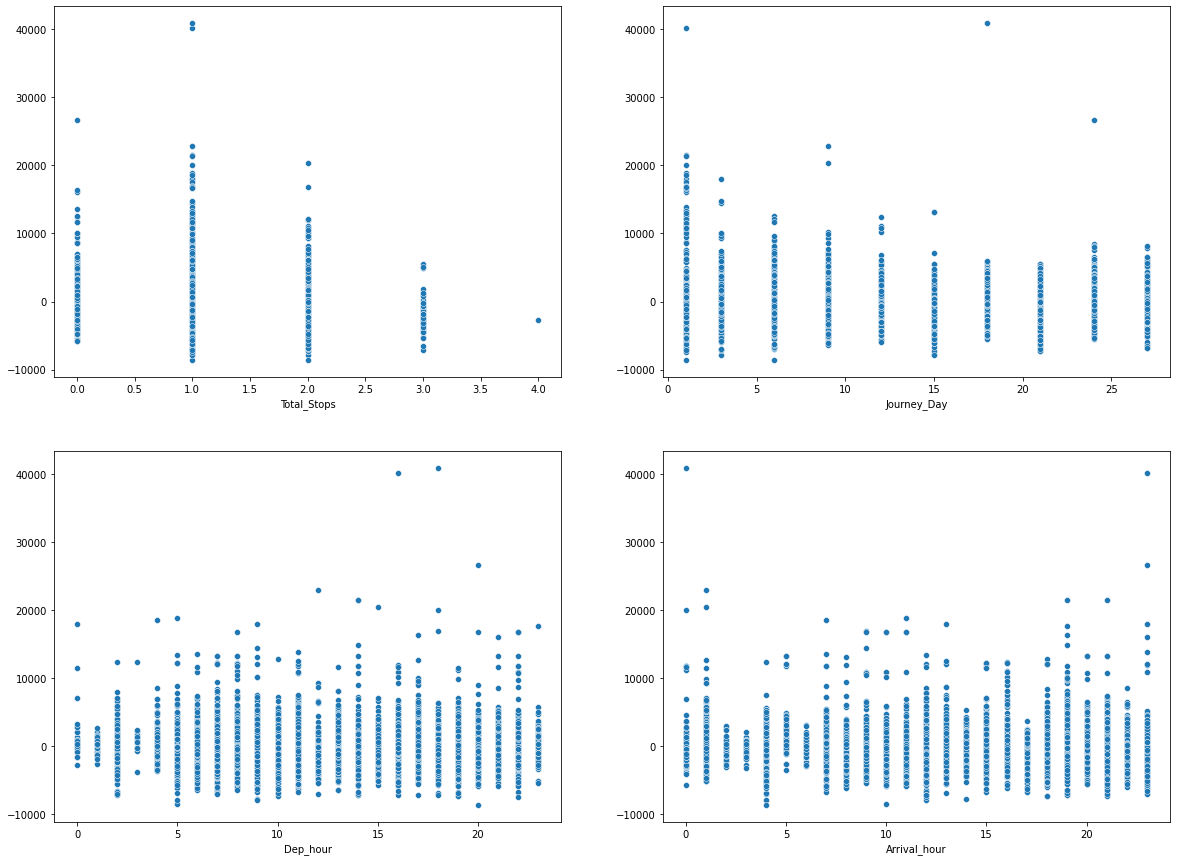

In [71]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train_signi_var.columns[1:5], ax.flatten()):
    sns.scatterplot(X_train_signi_var[variable], MLR_model_with_significant_var.resid , ax=subplot)

# display the plot
plt.show()

# Random Forest Model

In [72]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=49)

In [73]:
print(X_train.shape[0]/len(df)*100)
print(X_test.shape[0]/len(df)*100)
print(y_train.shape[0]/len(df)*100)
print(y_test.shape[0]/len(df)*100)

79.99438307433066
20.00561692566935
79.99438307433066
20.00561692566935


Hence Statistically proved that data is splitted into 80:20

In [74]:
rfr = RandomForestRegressor()
rfr.fit(X_train , y_train)

RandomForestRegressor()

In [75]:
pred = rfr.predict(X_test)

In [76]:
rfr.score(X_train , y_train)

0.954160339747209

In [77]:
rfr.score(X_test , y_test)

0.8303693114373584

<AxesSubplot:xlabel='Price', ylabel='Density'>

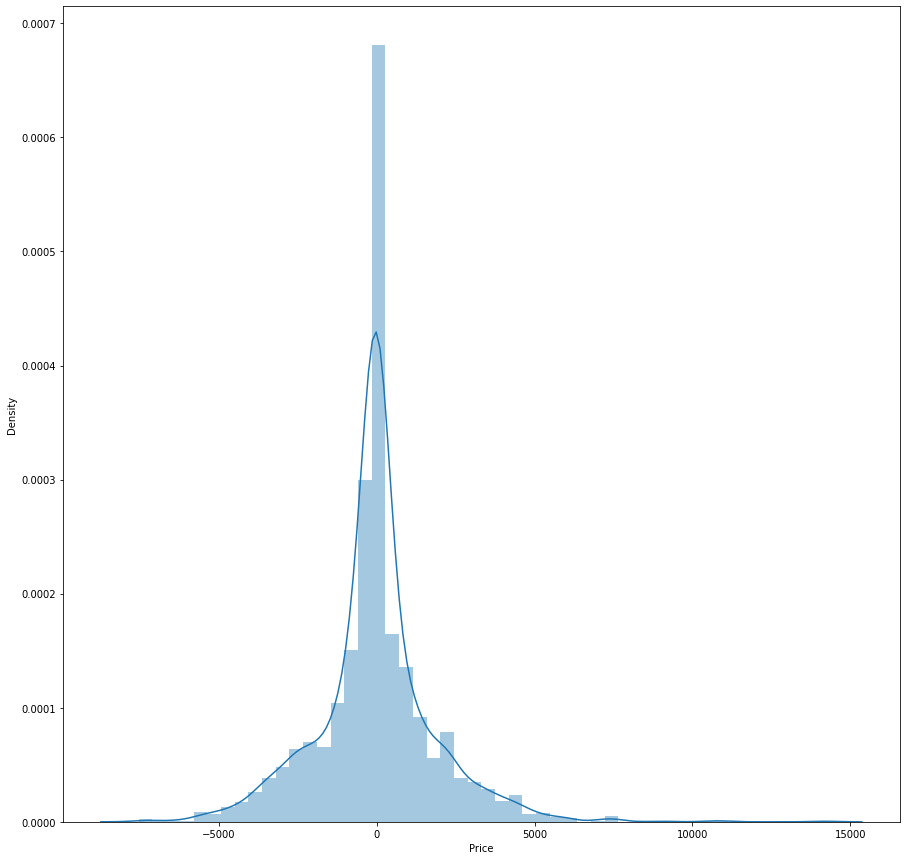

In [78]:
sns.distplot(y_test - pred)

Text(0, 0.5, 'pred')

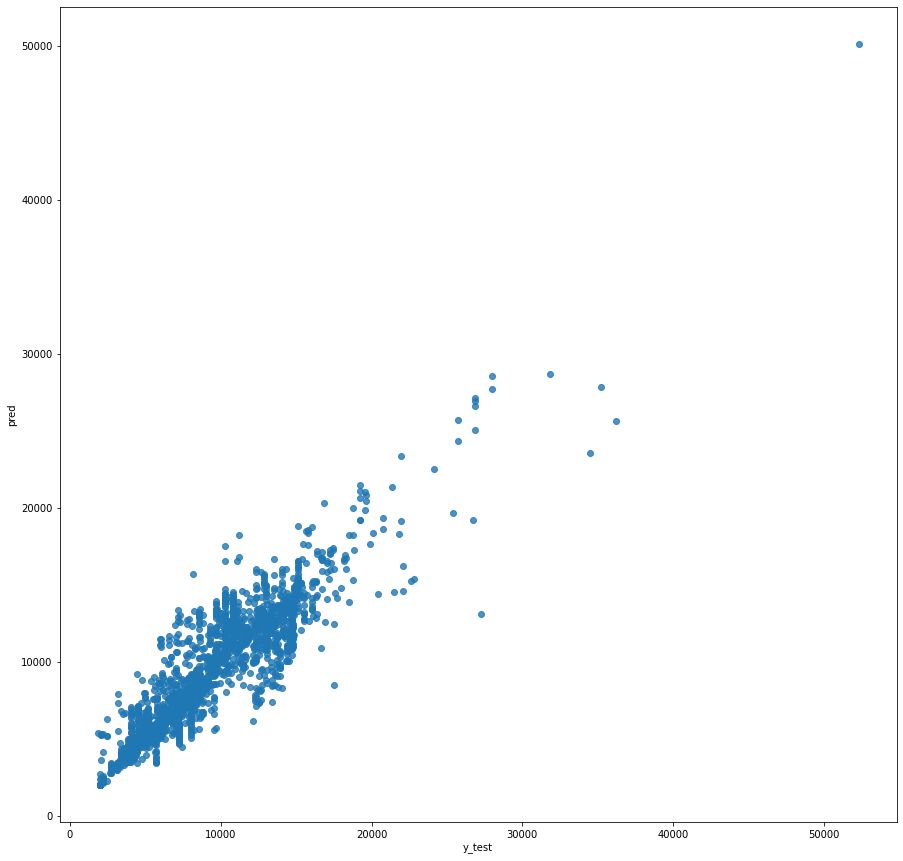

In [79]:
plt.scatter(y_test , pred , alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('pred')

In [80]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1194.925709498906
MSE: 3426500.6284911823
RMSE: 1851.0809351541554


In [81]:
metrics.r2_score(y_test,pred)

0.8303693114373584

# Hyperparameter tuning

In [82]:
n_estimators = [int(x) for x in np.linspace(100,2000,10)]
max_depth = [int(x) for x in np.linspace(100,2000,10)]
min_samples_split=[2,4,6,8,10,12,14]
min_samples_leaf=[1,3,5,7,8,10]
max_features=['sqrt','log2','auto',None]

random_search = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'max_features' : max_features,
    
}

random_search

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_depth': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
 'min_samples_leaf': [1, 3, 5, 7, 8, 10],
 'max_features': ['sqrt', 'log2', 'auto', None]}

In [83]:
rfr_random = RandomizedSearchCV(estimator=rfr , param_distributions=random_search , n_iter=10 , cv=5 , verbose=2 , random_state=51 , n_jobs=1)

In [84]:
rfr_random.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.9s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.8s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.9s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.6s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   5.7s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=   6.2s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=   6.8s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [100, 311, 522, 733, 944,
                                                      1155, 1366, 1577, 1788,
                                                      2000],
                                        'max_features': ['sqrt', 'log2', 'auto',
                                                         None],
                                        'min_samples_leaf': [1, 3, 5, 7, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=51, verbose=2)

In [85]:
rfr_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': 522}

In [86]:
prediction = rfr_random.predict(X_test)

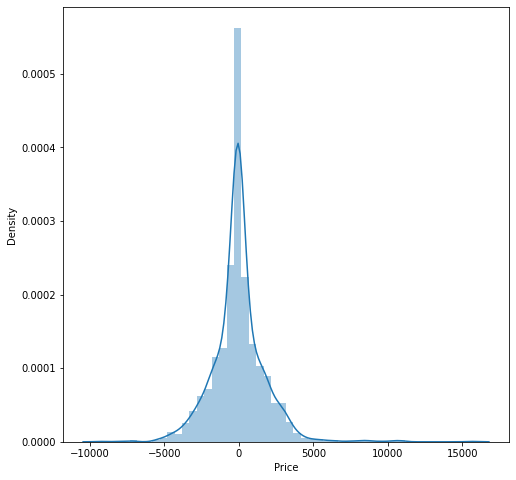

In [87]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

Text(0, 0.5, 'pred')

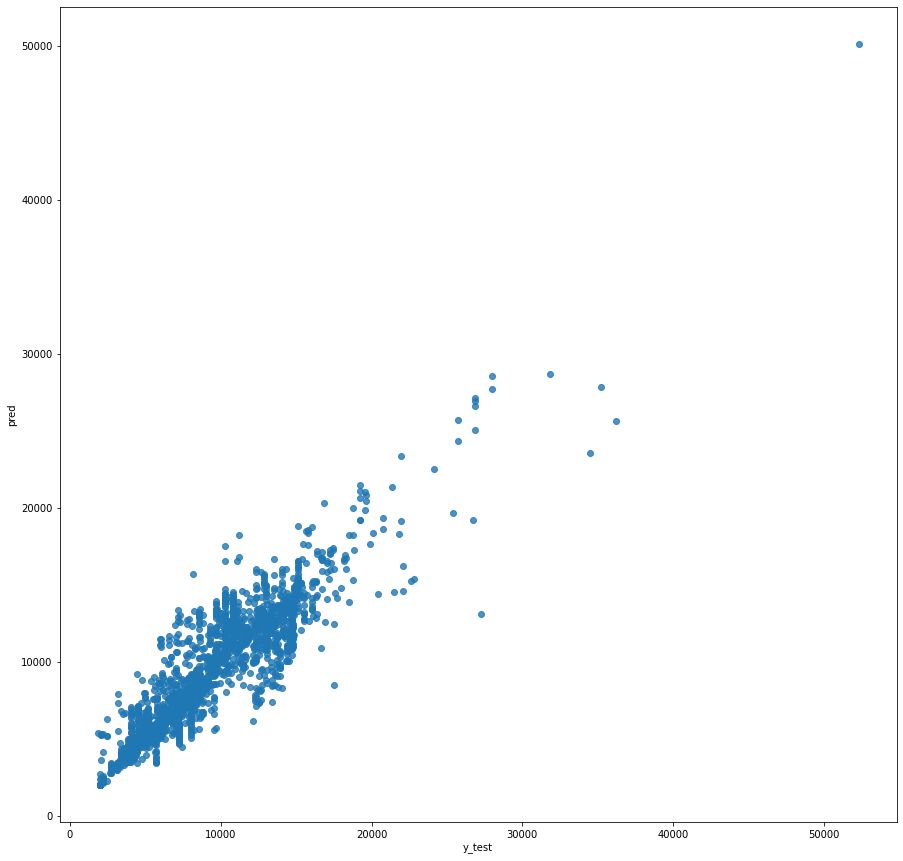

In [88]:
plt.scatter(y_test , pred , alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('pred')

In [89]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1170.0368210507208
MSE: 3176869.452515275
RMSE: 1782.3774719501127


In [90]:
metrics.r2_score(y_test,prediction)

0.8427274321145873

# Saving the final model

In [91]:
import pickle

In [92]:
filename = 'finalized_model.sav'
pickle.dump(rfr_random, open(filename, 'wb'))